In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
class Evaluation:
    def __init__(self, data = [], name = '', real = 0, parametr = ()):
        self.name = name
        self.data = np.array(data)
        self.real = real
        self.parametr = parametr

In [17]:
coins = {1 / 2, 3 / 4, 1 / 3} # Вероятности герба каждой монеты
N = 100 # Кол-во бросков каждой монеты

В качестве априорного распределения берем $Beta(\sum_{i=1}^{n}X_i + \alpha, n - \sum_{i=1}^{n}X_i + \beta)$

В таком случае баессовской оценкой для $p$ является $\frac{\sum_{i=1}^{n}X_i+\alpha}{n+\alpha+\beta}$

Оценкой максимального правдоподобия для $p$ является $\frac{\bar{X}}{n}$

In [18]:
alphas = {1, 2, 3}
betas = {1, 2, 3}
prioriParametrs = {(alpha, beta) for alpha in alphas for beta in betas}

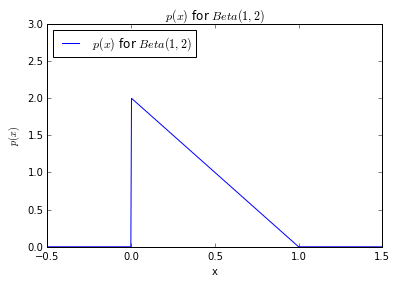

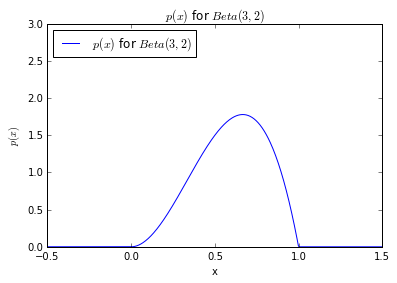

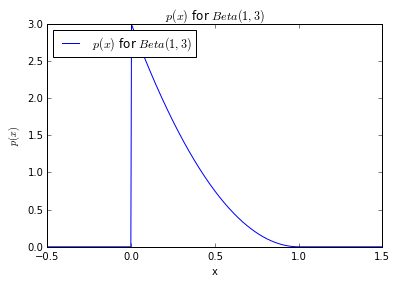

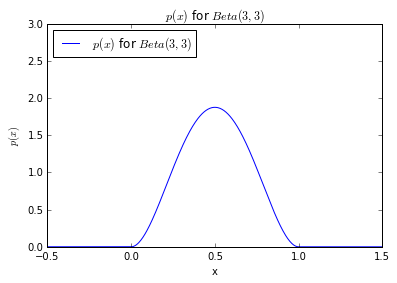

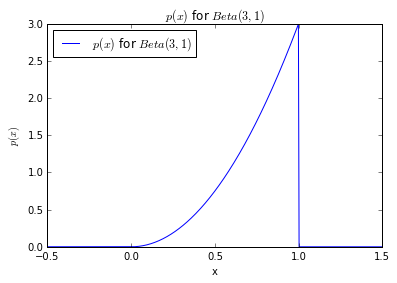

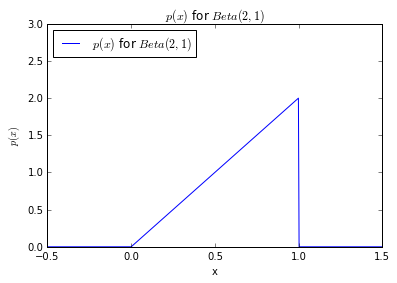

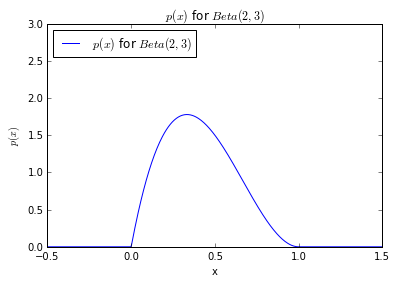

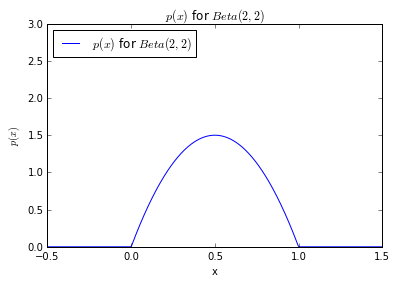

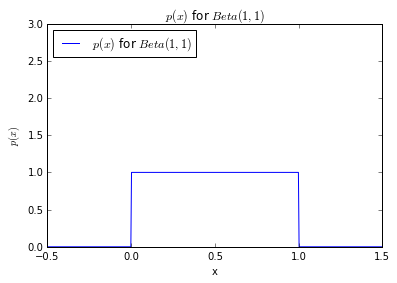

In [19]:
px = np.linspace(-2, 2, 1000)
for parametr in prioriParametrs:
    myFigure, myAxis = plt.subplots()
    myAxis.plot(px, [beta.pdf(x, parametr[0], parametr[1]) for x in px],
                label=r"$p(x)$ for $Beta({}, {})$".format(parametr[0], parametr[1]))
    myAxis.legend(loc="upper left")
    myAxis.set_xlabel("x")
    myAxis.set_ylabel(r"$p(x)$")
    myAxis.set_ylim(0, 3)
    myAxis.set_xlim(-0.5, 1.5)
    myAxis.set_title(r"$p(x)$ for $Beta({}, {})$".format(parametr[0], parametr[1]))

Видно, что $Beta(3, 3)$ неплохо должно подойти для симметричной монетки. $Beta(2, 3)$ и $Beta(3, 2)$ для немного перекошенной. Такие же распределения как $Beta(1, 3)$, $Beta(1, 2)$ и прочие, похожие, подойдут для сильно кривых монеток. Beta(1, 1) это вообще равномерное рспределение, так что для оценки вероятности выпадения монетки оно совсем не походит.

In [20]:
# Поборосали монетки

values = {}
for p in coins:
    values.update({p: np.random.binomial(1, p, N)})

In [21]:
evaluations = []

for p in coins:
    evaluations.append(Evaluation([
            np.sum([value for value in values[p][:n]]) / len([value for value in values[p][:n]])
            for n in range(1, N + 1)
        ],
        r"MMP",
        p
    ))
    for parametr in prioriParametrs:
        evaluations.append(Evaluation([
                (np.sum([value for value in values[p][:n]]) + parametr[0]) / (n + parametr[0] + parametr[1])
                 for n in range(1, N + 1)
            ],
            r"$\alpha={}, \beta={}$".format(parametr[0], parametr[1]),
            p, parametr
        ))

In [22]:
class EvaluationComparison:
    def __init__(self, goodEvaluation, badEvaluation, MMPEvaluation, parametr):
        self.good = goodEvaluation
        self.bad = badEvaluation
        self.MMP = MMPEvaluation
        self.parametr = parametr

    def plot(self):
        axis.plot (np.abs(self.good.data - self.good.real), label=r"good: {}".format(self.good.name))
        axis.plot (np.abs(self.bad.data - self.bad.real), label=r"bad: {}".format(self.bad.name))
        axis.plot (np.abs(self.MMP.data - self.MMP.real), label=r"MMP: $\frac{\bar{X}}{n}$")
        axis.legend(loc="upper left")
        axis.set_xlabel("n")
        axis.set_ylabel(r"Evaluations")
        axis.set_title("Evaluations comparison for p = {}".format(self.parametr))

In [23]:
comparisons = [
    {'p': 1/2, 'good': (3, 3), 'bad': (3, 1)},
    {'p': 3/4, 'good': (3, 2), 'bad': (1, 3)},
    {'p': 1/3, 'good': (2, 3), 'bad': (3, 1)}
]

In [24]:
evaluationsComparisons = []

for comparison in comparisons:
    good, bad, MMP = Evaluation(), Evaluation(), Evaluation()
    for evaluation in evaluations:
        if (evaluation.real == comparison['p']) and (evaluation.parametr == comparison['good']):
            good = evaluation
        if (evaluation.real == comparison['p']) and (evaluation.parametr == comparison['bad']):
            bad = evaluation
        if (evaluation.real == comparison['p']) and (evaluation.name == "MMP"):
            MMP = evaluation
    evaluationsComparisons.append(EvaluationComparison(good, bad, MMP, comparison['p']))

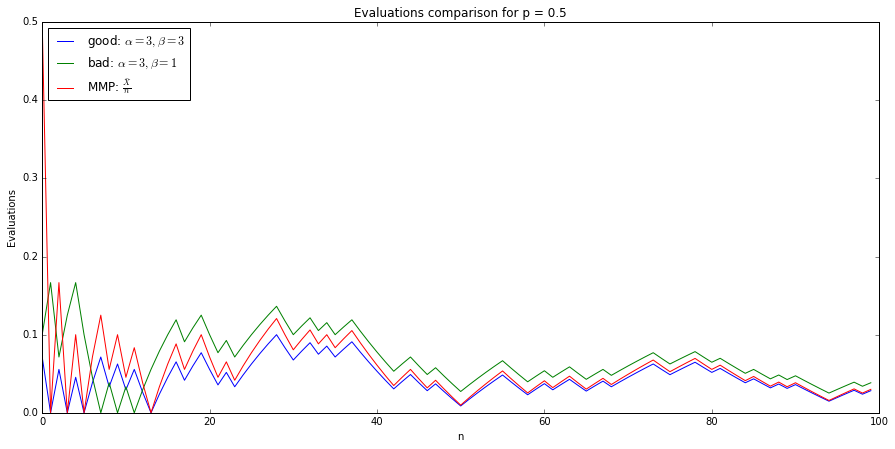

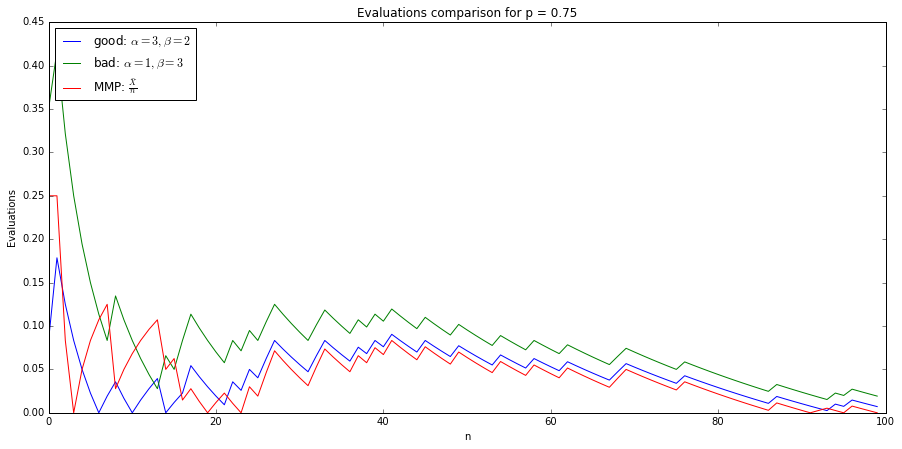

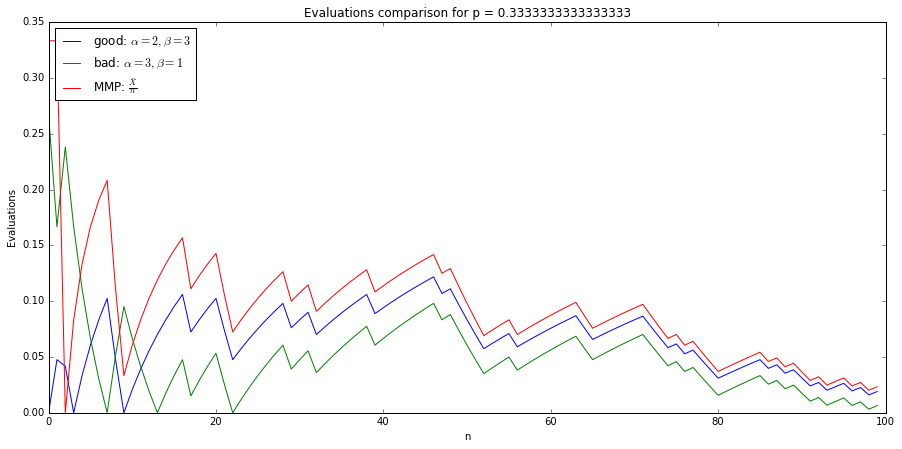

In [25]:
for evaluationsComparison in evaluationsComparisons:
    figure = plt.figure(figsize=(15,7))
    axis = figure.add_subplot(1, 1, 1)
    evaluationsComparison.plot()